In [1]:
# PACKAGE LOADING
import pandas as pd
import os
import numpy as np
import pandas as pd
import collections
import scipy.stats as st
import seaborn as sns
import collections
import matplotlib.pyplot as plt

#DISPLAY ALL THE COLUMNS IN CASE 
pd.set_option('display.max_columns', None)

#SET THE PATH TO LOCAL
os.chdir('/Users/khavya/Box/MS - Financial Engineering/Fall 2020/FIN566 - Algorithmic Market Microstructure/')

In [2]:
fillMSFT = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_fill.csv')
orderMSFT = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_order.csv')
pnlMSFT = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_pnl.csv')

fillAAPL = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_fill.csv')
orderAAPL = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_order.csv')
pnlAAPL = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_pnl.csv')

fillINTC = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_fill.csv')
orderINTC = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_order.csv')
pnlINTC = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_pnl.csv')

fillJPM = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_fill.csv')
orderJPM = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_order.csv')
pnlJPM = pd.read_csv('Backtesting/backtestingResults_SPY2COMP_BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_pnl.csv')

In [3]:
# Setting indicator variables to find if the particular order is for the buy side or sell side

# MSFT
fillMSFT['buy'] = 0
fillMSFT['sell'] = 0
for i in range(len(fillMSFT)):
    if fillMSFT['Quantity'].loc[i] > 0:
        fillMSFT['buy'].loc[i] = 1
    if fillMSFT['Quantity'].loc[i] < 0:
        fillMSFT['sell'].loc[i] = -1

# AAPL
fillAAPL['buy'] = 0
fillAAPL['sell'] = 0
for i in range(len(fillAAPL)):
    if fillAAPL['Quantity'].loc[i] > 0:
        fillAAPL['buy'].loc[i] = 1
    if fillAAPL['Quantity'].loc[i] < 0:
        fillAAPL['sell'].loc[i] = -1

# INTC
fillINTC['buy'] = 0
fillINTC['sell'] = 0
for i in range(len(fillINTC)):
    if fillINTC['Quantity'].loc[i] > 0:
        fillINTC['buy'].loc[i] = 1
    if fillINTC['Quantity'].loc[i] < 0:
        fillINTC['sell'].loc[i] = -1

# JPM
fillJPM['buy'] = 0
fillJPM['sell'] = 0
for i in range(len(fillJPM)):
    if fillJPM['Quantity'].loc[i] > 0:
        fillJPM['buy'].loc[i] = 1
    if fillJPM['Quantity'].loc[i] < 0:
        fillJPM['sell'].loc[i] = -1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
# Calculating the cost invested to buy and the cost gained while selling
# MSFT
fillMSFT['buy_cost'] = 0
fillMSFT['sell_gain'] = 0
gain = []
for i in range(len(fillMSFT)):
        if fillMSFT['buy'].loc[i] > 0:
            gain.append(-fillMSFT['Quantity'].loc[i] * fillMSFT['Price'].loc[i] - fillMSFT['ExecutionCost'].loc[i])
        else:
            gain.append(0)    
fillMSFT['buy_cost'] = gain
gain = []
for i in range(len(fillMSFT)):
        if fillMSFT['sell'].loc[i] < 0:
            gain.append(-fillMSFT['Quantity'].loc[i] * fillMSFT['Price'].loc[i] - fillMSFT['ExecutionCost'].loc[i])
        else:
            gain.append(0)
fillMSFT['sell_gain'] = gain

# AAPL
fillAAPL['buy_cost'] = 0
fillAAPL['sell_gain'] = 0
buy_cost = []
for i in range(len(fillAAPL)):
        if fillAAPL['buy'].loc[i] > 0:
            buy_cost.append(-fillAAPL['Quantity'].loc[i] * fillAAPL['Price'].loc[i] - fillAAPL['ExecutionCost'].loc[i])
        else:
            buy_cost.append(0)    
fillAAPL['buy_cost'] = buy_cost
gain = []
for i in range(len(fillAAPL)):
        if fillAAPL['sell'].loc[i] < 0:
            gain.append(-fillAAPL['Quantity'].loc[i] * fillAAPL['Price'].loc[i] - fillAAPL['ExecutionCost'].loc[i])
        else:
            gain.append(0)
fillAAPL['sell_gain'] = gain

# INTC
fillINTC['buy_cost'] = 0
fillINTC['sell_gain'] = 0
buy_cost = []
for i in range(len(fillINTC)):
        if fillINTC['buy'].loc[i] > 0:
            buy_cost.append(-fillINTC['Quantity'].loc[i] * fillINTC['Price'].loc[i] - fillINTC['ExecutionCost'].loc[i])
        else:
            buy_cost.append(0)    
fillINTC['buy_cost'] = buy_cost
gain = []
for i in range(len(fillINTC)):
        if fillINTC['sell'].loc[i] < 0:
            gain.append(-fillINTC['Quantity'].loc[i] * fillINTC['Price'].loc[i] - fillINTC['ExecutionCost'].loc[i])
        else:
            gain.append(0)
fillINTC['sell_gain'] = gain

# JPM
fillJPM['buy_cost'] = 0
fillJPM['sell_gain'] = 0
buy_cost = []
for i in range(len(fillJPM)):
        if fillJPM['buy'].loc[i] > 0:
            buy_cost.append(-fillJPM['Quantity'].loc[i] * fillJPM['Price'].loc[i] - fillJPM['ExecutionCost'].loc[i])
        else:
            buy_cost.append(0)    
fillJPM['buy_cost'] = buy_cost
gain = []
for i in range(len(fillJPM)):
        if fillJPM['sell'].loc[i] < 0:
            gain.append(-fillJPM['Quantity'].loc[i] * fillJPM['Price'].loc[i] - fillJPM['ExecutionCost'].loc[i])
        else:
            gain.append(0)
fillJPM['sell_gain'] = gain

In [5]:
# Caclulating the simple return
# MSFT
pnlMSFT['Cumulative PnL'].loc[0] = 0
pnlMSFT['simplereturn'] = pnlMSFT['Cumulative PnL'] - pnlMSFT['Cumulative PnL'].shift(1)
print(len(pnlMSFT))

# AAPL
pnlAAPL['Cumulative PnL'].loc[0] = 0
pnlAAPL['simplereturn'] = pnlAAPL['Cumulative PnL'] - pnlAAPL['Cumulative PnL'].shift(1)
print(len(pnlAAPL))

# INTC
pnlINTC['Cumulative PnL'].loc[0] = 0
pnlINTC['simplereturn'] = pnlINTC['Cumulative PnL'] - pnlINTC['Cumulative PnL'].shift(1)
print(len(pnlINTC))

#JPM
pnlJPM['Cumulative PnL'].loc[0] = 0
pnlJPM['simplereturn'] = pnlJPM['Cumulative PnL'] - pnlJPM['Cumulative PnL'].shift(1)
print(len(pnlJPM))

7126
6365
7407
6650


In [6]:
# Profit and loss depends on how much you buy or how much you invest
# MSFT
total_cost_MSFT = []
for i in range(len(pnlMSFT)):
    if i == 0:
        total_cost_MSFT.append(sum(fillMSFT[(fillMSFT['TradeTime'] <= pnlMSFT['Time'].loc[i])].buy_cost * (-1)))
    else:     
        total_cost_MSFT.append(sum(fillMSFT[(fillMSFT['TradeTime'] <= pnlMSFT['Time'].loc[i]) & (fillMSFT['TradeTime'] > pnlMSFT['Time'].loc[i-1])].buy_cost * (-1)))
pnlMSFT['total_cost'] = total_cost_MSFT

# AAPL
total_cost_AAPL = []
for i in range(len(pnlAAPL)):
    if i == 0:
        total_cost_AAPL.append(sum(fillAAPL[(fillAAPL['TradeTime'] <= pnlAAPL['Time'].loc[i])].buy_cost * (-1)))
    else:     
        total_cost_AAPL.append(sum(fillAAPL[(fillAAPL['TradeTime'] <= pnlAAPL['Time'].loc[i]) & (fillAAPL['TradeTime'] > pnlAAPL['Time'].loc[i-1])].buy_cost * (-1)))
pnlAAPL['total_cost'] = total_cost_AAPL

# INTC
total_cost_INTC = []
for i in range(len(pnlINTC)):
    if i == 0:
        total_cost_INTC.append(sum(fillINTC[(fillINTC['TradeTime'] <= pnlINTC['Time'].loc[i])].buy_cost * (-1)))
    else:     
        total_cost_INTC.append(sum(fillINTC[(fillINTC['TradeTime'] <= pnlINTC['Time'].loc[i]) & (fillINTC['TradeTime'] > pnlINTC['Time'].loc[i-1])].buy_cost * (-1)))
pnlINTC['total_cost'] = total_cost_INTC

# JPM
total_cost_JPM = []
for i in range(len(pnlJPM)):
    if i == 0:
        total_cost_JPM.append(sum(fillJPM[(fillJPM['TradeTime'] <= pnlJPM['Time'].loc[i])].buy_cost * (-1)))
    else:     
        total_cost_JPM.append(sum(fillJPM[(fillJPM['TradeTime'] <= pnlJPM['Time'].loc[i]) & (fillJPM['TradeTime'] > pnlJPM['Time'].loc[i-1])].buy_cost * (-1)))
pnlJPM['total_cost'] = total_cost_JPM


In [7]:
# MSFT
pnlMSFT['simplerate'] = 0
for i in range(len(pnlMSFT)):
    if i == 0:
           pnlMSFT['simplerate'].loc[i] = 0
    if i == 1:
           pnlMSFT['simplerate'].loc[i] = pnlMSFT['simplereturn'].loc[i]/(pnlMSFT['total_cost'].loc[i] + pnlMSFT['total_cost'].loc[i-1])  
    else:
           pnlMSFT['simplerate'].loc[i] = pnlMSFT['simplereturn'].loc[i]/(pnlMSFT['total_cost'].loc[i])
            
# AAPL
pnlAAPL['simplerate'] = 0
for i in range(len(pnlAAPL)):
    if i == 0:
           pnlAAPL['simplerate'].loc[i] = 0
    if i == 1:
           pnlAAPL['simplerate'].loc[i] = pnlAAPL['simplereturn'].loc[i]/(pnlAAPL['total_cost'].loc[i] + pnlAAPL['total_cost'].loc[i-1])  
    else:
           pnlAAPL['simplerate'].loc[i] = pnlAAPL['simplereturn'].loc[i]/(pnlAAPL['total_cost'].loc[i])
            
# INTC
pnlINTC['simplerate'] = 0
for i in range(len(pnlINTC)):
    if i == 0:
           pnlINTC['simplerate'].loc[i] = 0
    if i == 1:
           pnlINTC['simplerate'].loc[i] = pnlINTC['simplereturn'].loc[i]/(pnlINTC['total_cost'].loc[i] + pnlINTC['total_cost'].loc[i-1])  
    else:
           pnlINTC['simplerate'].loc[i] = pnlINTC['simplereturn'].loc[i]/(pnlINTC['total_cost'].loc[i])

# JPM
pnlJPM['simplerate'] = 0
for i in range(len(pnlJPM)):
    if i == 0:
           pnlJPM['simplerate'].loc[i] = 0
    if i == 1:
           pnlJPM['simplerate'].loc[i] = pnlJPM['simplereturn'].loc[i]/(pnlJPM['total_cost'].loc[i] + pnlJPM['total_cost'].loc[i-1])  
    else:
           pnlJPM['simplerate'].loc[i] = pnlJPM['simplereturn'].loc[i]/(pnlJPM['total_cost'].loc[i])
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-pac

In [8]:
# Filtering the data to remove NaN and inf
# MSFT
df_MSFT = pnlMSFT
df_MSFT.replace([np.inf, -np.inf], np.nan, inplace = True) 
df_MSFT.dropna(inplace = True)  
print(len(df_MSFT))

# AAPL
df_AAPL = pnlAAPL
df_AAPL.replace([np.inf, -np.inf], np.nan, inplace = True) 
df_AAPL.dropna(inplace = True)  
print(len(df_AAPL))

#INTC
df_INTC = pnlINTC
df_INTC.replace([np.inf, -np.inf], np.nan, inplace = True) 
df_INTC.dropna(inplace = True)  
print(len(df_INTC))

#JPM
df_JPM = pnlJPM
df_JPM.replace([np.inf, -np.inf], np.nan, inplace = True) 
df_JPM.dropna(inplace = True)  
print(len(df_JPM))

1218
1091
1038
982


In [9]:
# Calculating the cumulative return
# MSFT
df_MSFT = df_MSFT[df_MSFT['simplerate'] <= 10]
df_MSFT['cumulative'] = (1 + df_MSFT['simplerate']).cumprod()

# AAPL
df_AAPL = df_AAPL[df_AAPL['simplerate'] <= 10]
df_AAPL['cumulative'] = (1 + df_AAPL['simplerate']).cumprod()

# INTC
df_INTC = df_INTC[df_INTC['simplerate'] <= 10]
df_INTC['cumulative'] = (1 + df_INTC['simplerate']).cumprod()

# JPM
df_JPM = df_JPM[df_JPM['simplerate'] <= 10]
df_JPM['cumulative'] = (1 + df_JPM['simplerate']).cumprod()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


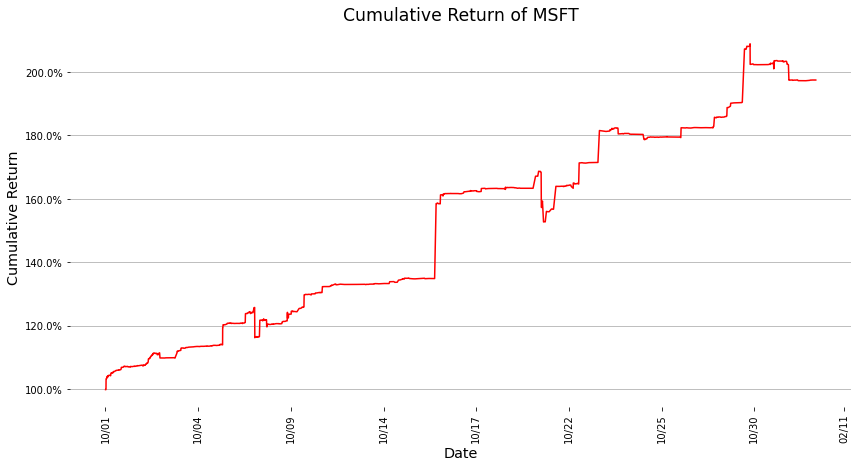

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Cumulative Return,Annualized Return,Volatility,Sharpe,Sortino,T-Stat,P-Value
0,97.507%,352267.064%,2.640%,133412.171,296663.347,2.686,0.007


In [10]:
# Plotting the cumulative returns

# MSFT
fig, ax = plt.subplots(figsize = (14,7))
plt.gca().yaxis.grid(True)
positions = (0, 929, 1857, 2785, 3714, 4643, 5571, 6500, 7400)
labels = ('10/01', '10/04', '10/09', '10/14', '10/17', '10/22', '10/25', '10/30', '02/11')
plt.xticks(positions, labels, rotation = '90')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('Cumulative Return', fontsize = "x-large")
ax.set_title('Cumulative Return of MSFT',fontsize = "xx-large")
ax.plot(df_MSFT.cumulative, color = 'red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().set_yticklabels(['{:.1f}%'.format(x * 100) for x in plt.gca().get_yticks()]) 
plt.savefig('/Users/khavya/Box/MS - Financial Engineering/Fall 2020/FIN566 - Algorithmic Market Microstructure/Plots/MSFT.png', dpi=400)
plt.show()

# Calculating other parameters
cumulate_ret = df_MSFT[-1:]
cr = cumulate_ret[['cumulative']] - 1
cr['Annualized'] = (cr['cumulative'] + 1)**(12) - 1
cr['vol'] = np.std(df_MSFT['simplerate']) * (12**0.5)
cr['Sharpe'] = cr['Annualized']/cr['vol']
df_MSFT['downside_returns'] = 0
risk_free_rate = 0
target = 0
df_MSFT.loc[df_MSFT['simplerate'] < target, 'downside_returns'] = df_MSFT['simplerate']**2
down_stdev = np.sqrt(df_MSFT['downside_returns'].mean() * 12)
cr['Sortino'] = cr['Annualized']/down_stdev
cr['T-Stat'] = st.ttest_1samp(df_MSFT['simplerate'], 0).statistic
cr['P-Value'] = st.ttest_1samp(df_MSFT['simplerate'], 0).pvalue

data = {'Cumulative Return':['{:.3f}%'.format(float(cr['cumulative'])*100)],
        'Annualized Return':['{:.3f}%'.format(float(cr['Annualized'])*100)],
        'Volatility': ['{:.3f}%'.format(float(cr['vol'])*100)],
        'Sharpe': ['{:.3f}'.format(float(cr['Sharpe']))],
        'Sortino': ['{:.3f}'.format(float(cr['Sortino']))],
        'T-Stat': ['{:.3f}'.format(float(cr['T-Stat']))],
        'P-Value': ['{:.3f}'.format(float(cr['P-Value']))]}
chart = pd.DataFrame(data, columns = ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe', 'Sortino', 
                                      'T-Stat', 'P-Value'])
chart

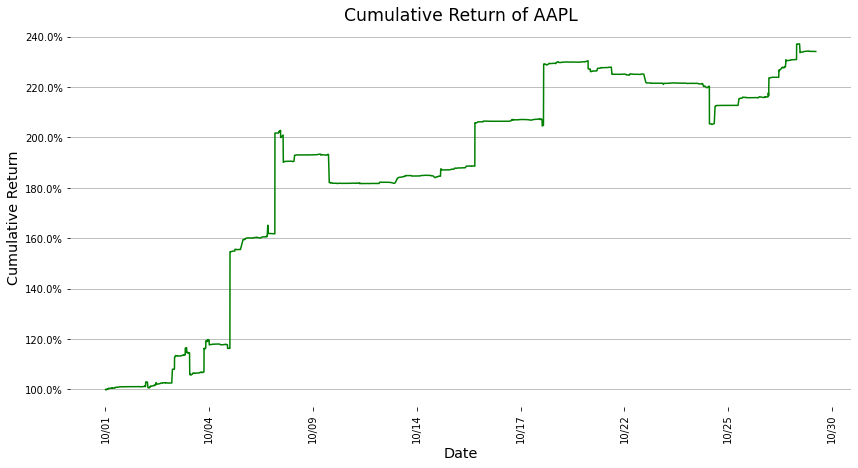

,Cumulative Return,Annualized Return,Volatility,Sharpe,Sortino,T-Stat,P-Value
0,134.135%,2713744.804%,5.026%,539891.413,1867062.713,1.984,0.047


In [11]:
# AAPL
fig, ax = plt.subplots(figsize = (14,7))
plt.gca().yaxis.grid(True)
positions = (0, 929, 1857, 2785, 3714, 4643, 5571, 6500, 7400)
labels = ('10/01', '10/04', '10/09', '10/14', '10/17', '10/22', '10/25', '10/30', '02/11')
plt.xticks(positions, labels, rotation = '90')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('Cumulative Return', fontsize = "x-large")
ax.set_title('Cumulative Return of AAPL',fontsize = "xx-large")
ax.plot(df_AAPL.cumulative, color = 'green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().set_yticklabels(['{:.1f}%'.format(x * 100) for x in plt.gca().get_yticks()]) 
plt.savefig('/Users/khavya/Box/MS - Financial Engineering/Fall 2020/FIN566 - Algorithmic Market Microstructure/Plots/AAPL.png', dpi=400)
plt.show()

# Calculating other parameters
cumulate_ret = df_AAPL[-1:]
cr = cumulate_ret[['cumulative']] - 1
cr['Annualized'] = (cr['cumulative'] + 1)**(12) - 1
cr['vol'] = np.std(df_AAPL['simplerate']) * (12**0.5)
cr['Sharpe'] = cr['Annualized']/cr['vol']
df_AAPL['downside_returns'] = 0
risk_free_rate = 0
target = 0
df_AAPL.loc[df_AAPL['simplerate'] < target, 'downside_returns'] = df_AAPL['simplerate']**2
down_stdev = np.sqrt(df_AAPL['downside_returns'].mean() * 12)
cr['Sortino'] = cr['Annualized']/down_stdev
cr['T-Stat'] = st.ttest_1samp(df_AAPL['simplerate'], 0).statistic
cr['P-Value'] = st.ttest_1samp(df_AAPL['simplerate'], 0).pvalue

data = {'Cumulative Return':['{:.3f}%'.format(float(cr['cumulative'])*100)],
        'Annualized Return':['{:.3f}%'.format(float(cr['Annualized'])*100)],
        'Volatility': ['{:.3f}%'.format(float(cr['vol'])*100)],
        'Sharpe': ['{:.3f}'.format(float(cr['Sharpe']))],
        'Sortino': ['{:.3f}'.format(float(cr['Sortino']))],
        'T-Stat': ['{:.3f}'.format(float(cr['T-Stat']))],
        'P-Value': ['{:.3f}'.format(float(cr['P-Value']))]}
chart = pd.DataFrame(data, columns = ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe', 'Sortino', 
                                      'T-Stat', 'P-Value'])
chart

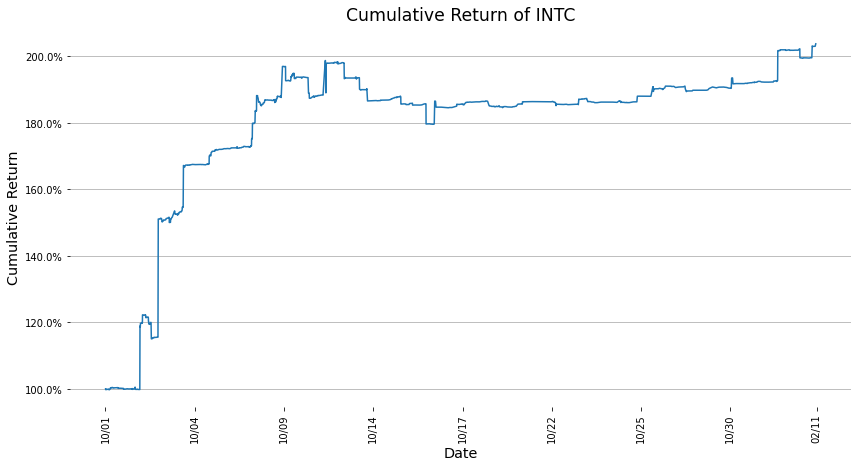

,Cumulative Return,Annualized Return,Volatility,Sharpe,Sortino,T-Stat,P-Value
0,103.804%,513427.848%,4.298%,119457.607,540330.730,1.955,0.051


In [12]:
# INTC
fig, ax = plt.subplots(figsize = (14,7))
plt.gca().yaxis.grid(True)
positions = (0, 929, 1857, 2785, 3714, 4643, 5571, 6500, 7400)
labels = ('10/01', '10/04', '10/09', '10/14', '10/17', '10/22', '10/25', '10/30', '02/11')
plt.xticks(positions, labels, rotation = '90')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('Cumulative Return', fontsize = "x-large")
ax.set_title('Cumulative Return of INTC',fontsize = "xx-large")
ax.plot(df_INTC.cumulative)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().set_yticklabels(['{:.1f}%'.format(x * 100) for x in plt.gca().get_yticks()]) 
plt.savefig('/Users/khavya/Box/MS - Financial Engineering/Fall 2020/FIN566 - Algorithmic Market Microstructure/Plots/INTC.png', dpi=400)


plt.show()

# Calculating other parameters
cumulate_ret = df_INTC[-1:]
cr = cumulate_ret[['cumulative']] - 1
cr['Annualized'] = (cr['cumulative'] + 1)**(12) - 1
cr['vol'] = np.std(df_INTC['simplerate']) * (12**0.5)
cr['Sharpe'] = cr['Annualized']/cr['vol']
df_INTC['downside_returns'] = 0
risk_free_rate = 0
target = 0
df_INTC.loc[df_INTC['simplerate'] < target, 'downside_returns'] = df_INTC['simplerate']**2
down_stdev = np.sqrt(df_INTC['downside_returns'].mean() * 12)
cr['Sortino'] = cr['Annualized']/down_stdev
cr['T-Stat'] = st.ttest_1samp(df_INTC['simplerate'], 0).statistic
cr['P-Value'] = st.ttest_1samp(df_INTC['simplerate'], 0).pvalue

data = {'Cumulative Return':['{:.3f}%'.format(float(cr['cumulative'])*100)],
        'Annualized Return':['{:.3f}%'.format(float(cr['Annualized'])*100)],
        'Volatility': ['{:.3f}%'.format(float(cr['vol'])*100)],
        'Sharpe': ['{:.3f}'.format(float(cr['Sharpe']))],
        'Sortino': ['{:.3f}'.format(float(cr['Sortino']))],
        'T-Stat': ['{:.3f}'.format(float(cr['T-Stat']))],
        'P-Value': ['{:.3f}'.format(float(cr['P-Value']))]}
chart = pd.DataFrame(data, columns = ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe', 'Sortino', 
                                      'T-Stat', 'P-Value'])
chart

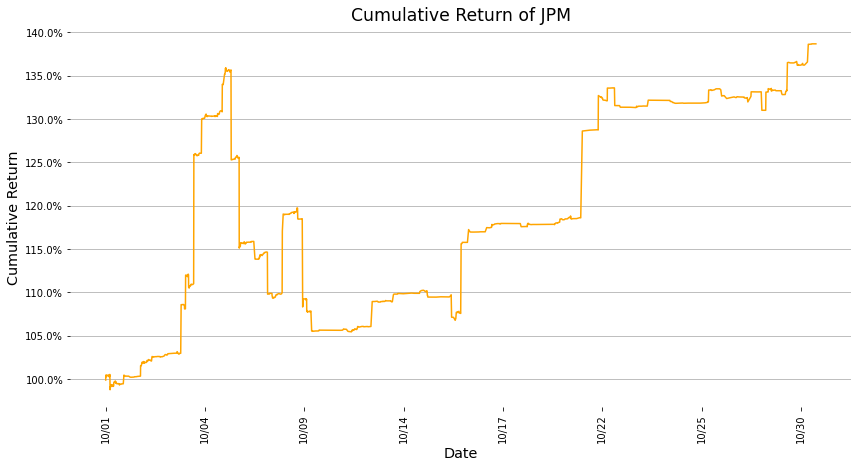

,Cumulative Return,Annualized Return,Volatility,Sharpe,Sortino,T-Stat,P-Value
0,38.663%,4952.688%,2.914%,1699.846,2855.516,1.369,0.171


In [13]:
# JPM
fig, ax = plt.subplots(figsize = (14,7))
plt.gca().yaxis.grid(True)
positions = (0, 929, 1857, 2785, 3714, 4643, 5571, 6500, 7400)
labels = ('10/01', '10/04', '10/09', '10/14', '10/17', '10/22', '10/25', '10/30', '02/11')
plt.xticks(positions, labels, rotation = '90')
ax.set_xlabel('Date', fontsize = 'x-large')
ax.set_ylabel('Cumulative Return', fontsize = "x-large")
ax.set_title('Cumulative Return of JPM',fontsize = "xx-large")
ax.plot(df_JPM.cumulative, color = 'orange')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().set_yticklabels(['{:.1f}%'.format(x * 100) for x in plt.gca().get_yticks()]) 
plt.savefig('/Users/khavya/Box/MS - Financial Engineering/Fall 2020/FIN566 - Algorithmic Market Microstructure/Plots/JPM.png', dpi=400)
plt.show()

# Calculating other parameters
cumulate_ret = df_JPM[-1:]
cr = cumulate_ret[['cumulative']] - 1
cr['Annualized'] = (cr['cumulative'] + 1)**(12) - 1
cr['vol'] = np.std(df_JPM['simplerate']) * (12**0.5)
cr['Sharpe'] = cr['Annualized']/cr['vol']
df_JPM['downside_returns'] = 0
risk_free_rate = 0
target = 0
df_JPM.loc[df_JPM['simplerate'] < target, 'downside_returns'] = df_JPM['simplerate']**2
down_stdev = np.sqrt(df_JPM['downside_returns'].mean() * 12)
cr['Sortino'] = cr['Annualized']/down_stdev
cr['T-Stat'] = st.ttest_1samp(df_JPM['simplerate'], 0).statistic
cr['P-Value'] = st.ttest_1samp(df_JPM['simplerate'], 0).pvalue

data = {'Cumulative Return':['{:.3f}%'.format(float(cr['cumulative'])*100)],
        'Annualized Return':['{:.3f}%'.format(float(cr['Annualized'])*100)],
        'Volatility': ['{:.3f}%'.format(float(cr['vol'])*100)],
        'Sharpe': ['{:.3f}'.format(float(cr['Sharpe']))],
        'Sortino': ['{:.3f}'.format(float(cr['Sortino']))],
        'T-Stat': ['{:.3f}'.format(float(cr['T-Stat']))],
        'P-Value': ['{:.3f}'.format(float(cr['P-Value']))]}
chart = pd.DataFrame(data, columns = ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe', 'Sortino', 
                                      'T-Stat', 'P-Value'])
chart